### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

In an experiment, the researcher manipulates the **independent variable**, measures changes in the **dependant variable** and seeks to control the **lurking variable**. In this particular experiment, the researcher manipulates the color of the word or the *color of the ink* in which the word is printed and measures changes in time from the two conditions: the congruent words condition and the incongruent words condition.

* The **independent variable** is the color of the word or the *color of the ink* in which the word is printed. 
* The **dependent variable** is the time it takes the participant to name the ink colors.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The same participant is measured twice and our data is presented as pairs of observations for the two conditions: the congruent and incongruent condition. We measure changes in average time between the two data points, for each participant and assess if there are statistically different. Therefore, we check if the average time for naming the word under the incongruent condition is statistically different than the average time for naming the color of the word under the congruent condition. We can state our hypotheses in terms of differences of means of time reaction. 

In order to assess if there is a difference in average times between the two conditions  I will use the **bootstrapping approach to simulate the results of a traditional hypothesis test**: 
1. Calculate our observed difference in means.
2. Simulate 10.000 samples of means for the congruent condition and 10.000 samples of means for the incongruent condition and their respective differences. 
3. Build the 95% confidence interval in order to see where our observed difference falls on the sampling distribution for difference in means.
3. Simulate under the null hypothesis, if the sampling distribution of the difference in means were centered at zero.
4. Visualize the two sampling distributions and see that they are different.
5. Calculate the p-value to make a decision about the null and alternative hypotheses at an alpha level of 0.05 and we reject the null in favor of the alternative. This suggests that there is a difference in average time reaction. Actually, under incongruent condition the participant needs more time to finish the task.

We are interested if the average time for incongruent condition is the same than under congruent condition. There is no question associated with a direction. Therefore this is a two-tailed test, we check in either of the two directions.

$H_0$: Changing the color of the words did not change the time it takes the participant to name the ink colors. 

$H_1$:  Changing the color of the words did change the time it takes the participant to name the ink colors. 

$$H_0: \mu_{incongruent} - \mu_{congruent} = 0$$
$$H_1: \mu_{incongruent} - \mu_{congruent} \neq 0$$

**$\mu_{incongruent}$ and $\mu_{congruent}$ are the population mean values for congruent condition and incongruent condition, respectively.**

A statistical test used for this situation is a dependant paired, sample for mean T-Test. This is used to find out if the mean differences for two sets of data points is zero.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

In [2]:
# read the data
df = pd.read_csv('stroopdata.csv')
df.head(1)

,Congruent,Incongruent
0,12.079,19.278


In [3]:
# number of rows and columns
df.shape

(24, 2)

In [3]:
# describe the dataset
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


## Measures of centers

In [4]:
# get the medians for the sample data
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [5]:
# get the means for the sample data
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [7]:
df['Incongruent'].mean() - df['Congruent'].mean()

7.964791666666667

We can see that the average time for completing the task under congruent condition is 14.05 seconds, lower than the average time for completing the task under incongruent condition which is 22.02 seconds. Actually, on average, under congruent condition, the participant finish the task in 7.96 seconds earlier than under the incongruent condition. Also, the means are approximately equal to the median values for the sample data.

### Measures of Variability

In [7]:
# get the standard deviation for the sample data
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

The variability of the data is bigger for the incongruent data times with a standard deviation of 4.80 compared to 3.56 for the congruent data times. Therefore, the average distance of each observation from the mean is bigger for the incongruent data.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

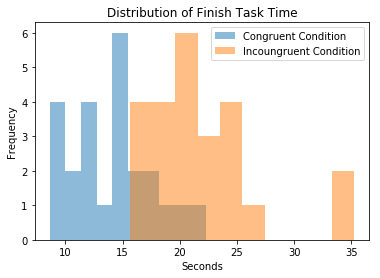

In [13]:
# plot the time histograms
plt.hist(df['Congruent'], alpha=0.5, label='Congruent Condition')
plt.hist(df['Incongruent'], alpha=0.5, label='Incoungruent Condition')

plt.title('Distribution of Finish Task Time')
plt.xlabel('Seconds')
plt.ylabel('Frequency')

plt.legend()
plt.show;

This histogram plots the distribution of finish time under congruent and incongruent condition. While the time for completing the task under congruent condition ranges from a minimum 8.63 to a maximum of around 22.32 seconds and 50% of the data ranging from 11.89 to 16.20 seconds, we can see that the distribution of time under second condition is more shifted to the right. Data points are ranging from about 15.68 to around 35.25 seconds, with 50% of the data ranging from 18.71 to 24.05 seconds. Furthermore, the average time to complete the task under congruent condition is around 14.05 while the average time under incongruent condition is higher at around 22.01. This suggests that there may be a difference in time between congruent and incongruent condition. In the meantime, we have to notice that the variability for the incongruent condition is bigger, with a Standard Deviation of 4.80, compared to 3.60 for the congruent condition. This may be due to the fact that there are two participants with higher times for completing the task under incongruent condition for about 35 seconds.   

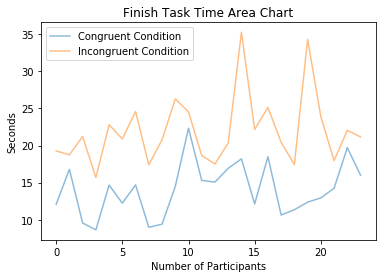

In [17]:
plt.plot(df['Congruent'], alpha=0.5, label='Congruent Condition')
plt.plot(df['Incongruent'], alpha=0.5, label='Incongruent Condition')

plt.title('Finish Task Time Area Chart')
plt.xlabel('Number of Participants')
plt.ylabel('Seconds')

plt.legend()
plt.show;

We can see from the above area chart that the time to complete the task under congruent condition took the participants less time than under incongruent condition.

In [19]:
corr = np.round(df['Congruent'].corr(df['Incongruent']), decimals=2)
corr

0.35

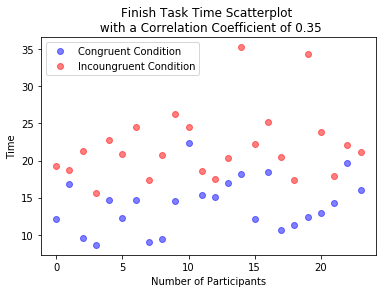

In [21]:
plt.plot(df['Congruent'], 'bo', alpha=0.5, label='Congruent Condition')
plt.plot(df['Incongruent'], 'ro', alpha=0.5, label='Incoungruent Condition')
plt.title('Finish Task Time Scatterplot \n with a Correlation Coefficient of {}'.format(corr))
plt.xlabel('Number of Participants')
plt.ylabel('Time')

plt.legend()
plt.show()

With a correlation coefficient of `0.35`, this scatter plot shows there is not a linear relationship between time to complete the task under congruent and incongruent group. This means that if one participant scores good at finishing the task under congruent condition, it doesn't have and effect of scoring good or bad under incongruent condition.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

### What is the difference in time means under congruent and incongruent condition? Is there evidence of a difference in average time reaction?

### #1 Bootstrap from the sample to build a confidence interval

In [23]:
# average times
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [24]:
df_sample = df.sample(24, replace=True)

In [25]:
congruent_mean = df_sample.Congruent.mean()
incongruent_mean = df_sample.Incongruent.mean()
obs_diff = incongruent_mean - congruent_mean
obs_diff

7.383083333333332

In [30]:
# simulate 10.000 mean samples from the congruent data
congruent_means = np.random.choice(df.Congruent, size=(10000, 24), replace=True).mean(axis=1)
# simulate 10.000 mean samples from the incongruent data
incongruent_means = np.random.choice(df.Incongruent, size=(10000, 24), replace=True).mean(axis=1)
# calculate the difference in means
diffs = incongruent_means - congruent_means

#### The standard deviation of the sampling distribution under incongruent condition

In [31]:
np.std(incongruent_means)

0.9505738007664861

#### The standard deviation of the sampling distribution under congruent condition

In [32]:
np.std(congruent_means)

0.7131459100677735

#### The standard deviation of the sampling distribution for difference in means

In [33]:
np.std(diffs)

1.1953661711641597

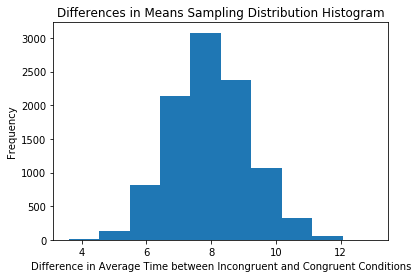

In [34]:
# plot the difference in means
plt.hist(diffs);
plt.xlabel('Difference in Average Time between Incongruent and Congruent Conditions')
plt.ylabel('Frequency')
plt.title('Differences in Means Sampling Distribution Histogram')

plt.show();

This is a normal distribution.

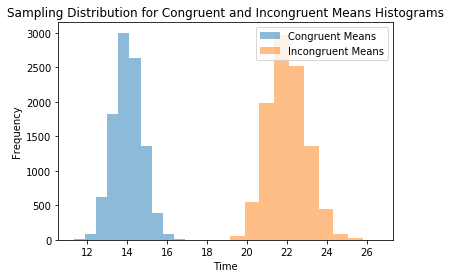

In [36]:
# plot the sampling distributions for congruent_means and incongruent_means
plt.hist(congruent_means, alpha = 0.5, label='Congruent Means')
plt.hist(incongruent_means, alpha = 0.5, label='Incongruent Means')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Sampling Distribution for Congruent and Incongruent Means Histograms')

plt.legend()
plt.show();

These are normal distributions.

### #2 Build 95% Confidence Intervals

In [48]:
# build the confidence interval
low, upper = np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)
low, upper

(5.6984166666666685, 10.408094791666667)

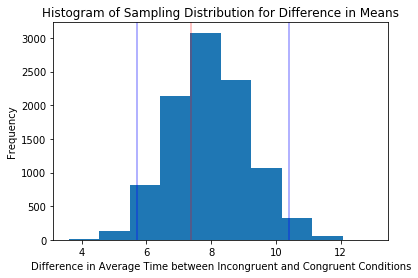

In [49]:
# plot the difference in means
plt.hist(diffs);

# where our observed statistic falls in the sampling distribution
plt.axvline(x=obs_diff, color='red', alpha=0.3)
plt.axvline(x=low, color='blue', alpha=0.3, linewidth=2);
plt.axvline(x=upper, color='blue', alpha=0.3, linewidth=2);

plt.title('Histogram of Sampling Distribution for Difference in Means')
plt.ylabel('Frequency')
plt.xlabel('Difference in Average Time between Incongruent and Congruent Conditions')
plt.show();

### #3 Conclusion

Since a Confidence Interval for the differences in average time under incongruent condition and congruent condition did not contain zero (5.70, 10.41), we have evidence of the mean time under incongruent condition is bigger than under congruent condition. Further, we would suggest that on average, under incongruent condition, the participant finish the task harder than under congruent condition.
We can be 95% confident that the difference in the average time under incongruent condition as compared to congruent condition is in the provided interval of 5.70 to 10.41 seconds. 

### #4 Finding Confidence Interval for a T-test

In [39]:
import statsmodels.stats.api as sms

X1 = df.Incongruent
X2 = df.Congruent

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
cm.tconfint_diff(usevar='unequal')

(5.504885145169363, 10.424698188163974)

The results are very similar.

### #5 Simulate under the Null

If the sampling distribution of the difference in means were centered at zero.

In [51]:
# simulate 10.000 draws from the sampling distribution under the null
null_vals = np.random.normal(loc=0, scale=np.std(diffs), size=10000) 

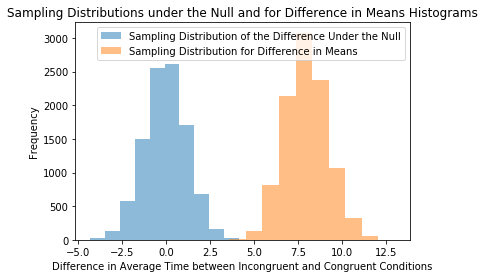

In [52]:
plt.hist(null_vals, alpha=0.5, label='Sampling Distribution of the Difference Under the Null'); 
plt.hist(diffs, alpha = 0.5, label='Sampling Distribution for Difference in Means');
plt.title('Sampling Distributions under the Null and for Difference in Means Histograms')
plt.xlabel('Difference in Average Time between Incongruent and Congruent Conditions')
plt.ylabel('Frequency')

plt.legend()
plt.show();

$$H_0: \mu_{incongruent} - \mu_{congruent} = 0$$
$$H_1: \mu_{incongruent} - \mu_{congruent} \neq 0$$

#### Calculate the `p-value` to make a decision about the null and alternative hypotheses

In [53]:
null_mean = null_vals.mean()

In [55]:
pval = (null_vals > obs_diff).mean() + (null_mean - (obs_diff - null_mean) < null_vals).mean() 
pval

1.0

Let's take a look at where these values fall on the null hypothesis histogram.

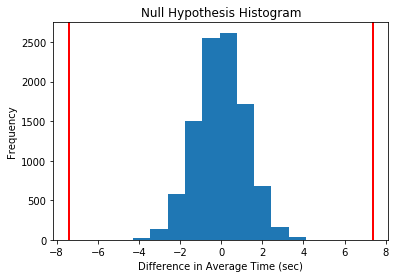

In [58]:
low = obs_diff
high = null_mean + (null_mean - obs_diff)

plt.hist(null_vals)

plt.title('Null Hypothesis Histogram')
plt.ylabel('Frequency')
plt.xlabel('Difference in Average Time (sec)')

plt.axvline(x=low, color='r', linewidth=2)
plt.axvline(x=high, color='r', linewidth=2);

### #6 Conclusion

- At an alpha level of 0.05 and a p-value of 1, we have evidence to reject the null in favor of the alternative.
- There are no data points from our null hypothesis that fall outside of this region;
- We have evidence to suggest that the null hypothesized value did not generate our sample statistic.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!